# Simulation Analysis Workflow

This notebook provides a complete analysis workflow for cilia simulations:
1. Load simulation data
2. Visualize basal and blob positions
3. Plot final simulation frame
4. Generate kymograph
5. Analyze wavelength using slope-based segmentation

All outputs are saved to `analysis_output/{category}_{date}/{N}fil/` subdirectories.

In [1]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the simulation path
# Adjust the date and path according to your actual simulation
sim_path = '../data/beat_C_double_sphere/20260128/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'

# Parameters (adjust these to match your simulation)
# filament_length = 200.2  # Filament length in simulation units (L)
num_segs = 20
filament_length = 2.6*(num_segs - 1)
num_steps = 500         # Steps per period
radius_L = 4.0
sphere_radius = radius_L*filament_length

## 1. Load Simulation Data

In [2]:
# Load the simulation data
print("=" * 60)
print("LOADING SIMULATION DATA")
print("=" * 60)
sim = load_simulation(sim_path, num_steps=num_steps, sphere_radius=sphere_radius, num_segs=num_segs)
print(f"\n✅ Successfully loaded simulation:")
print(f"   • Timesteps: {sim.phases.shape[0]}")
print(f"   • Filaments: {sim.phases.shape[1]}")
print(f"   • Segments per filament: {sim.num_segs}")
print(f"   • Sphere radius: {sim.sphere_radius:.2f} units = {sim.sphere_radius/filament_length:.2f} L")
print(f"   • Filament length: {filament_length:.2f} units (L)")
print(f"   • Time duration: {sim.times[-1]:.2f} periods")
print("=" * 60)

LOADING SIMULATION DATA


[info] Using num_steps=500 for time normalization.

✅ Successfully loaded simulation:
   • Timesteps: 1630
   • Filaments: 216
   • Segments per filament: 20
   • Sphere radius: 197.60 units = 4.00 L
   • Filament length: 49.40 units (L)
   • Time duration: 16.29 periods


## 2. Basal and Blob Position Visualization


PLOTTING BASAL POSITIONS


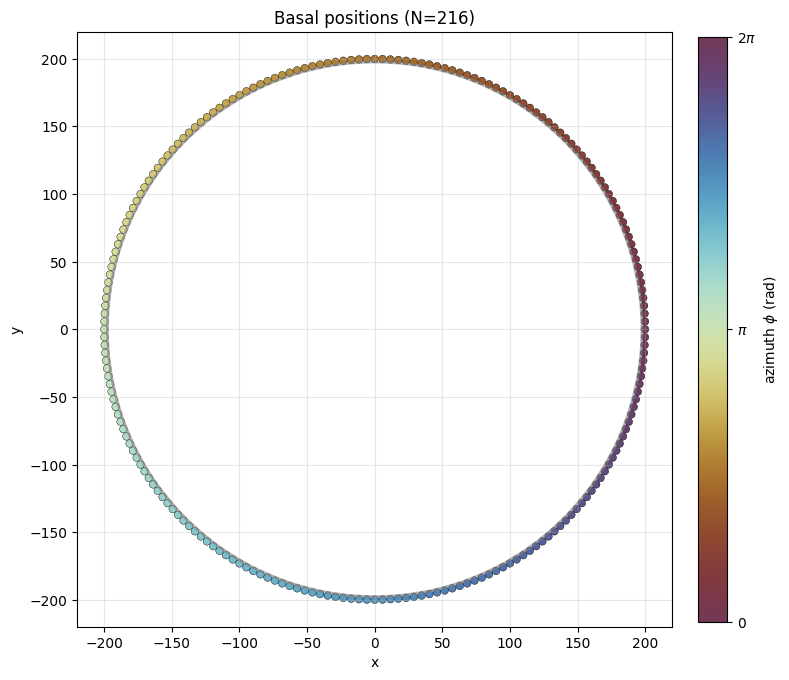

[info] Saved basal positions to analysis_output/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
✅ Basal positions saved


In [3]:
# Plot basal positions
print("\n" + "=" * 60)
print("PLOTTING BASAL POSITIONS")
print("=" * 60)
fig_basal, ax_basal = plot_basal_positions(
    sim_path,
    sim=sim,
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig_basal)
print("✅ Basal positions saved")


PLOTTING BLOB POSITIONS (Isometric View)


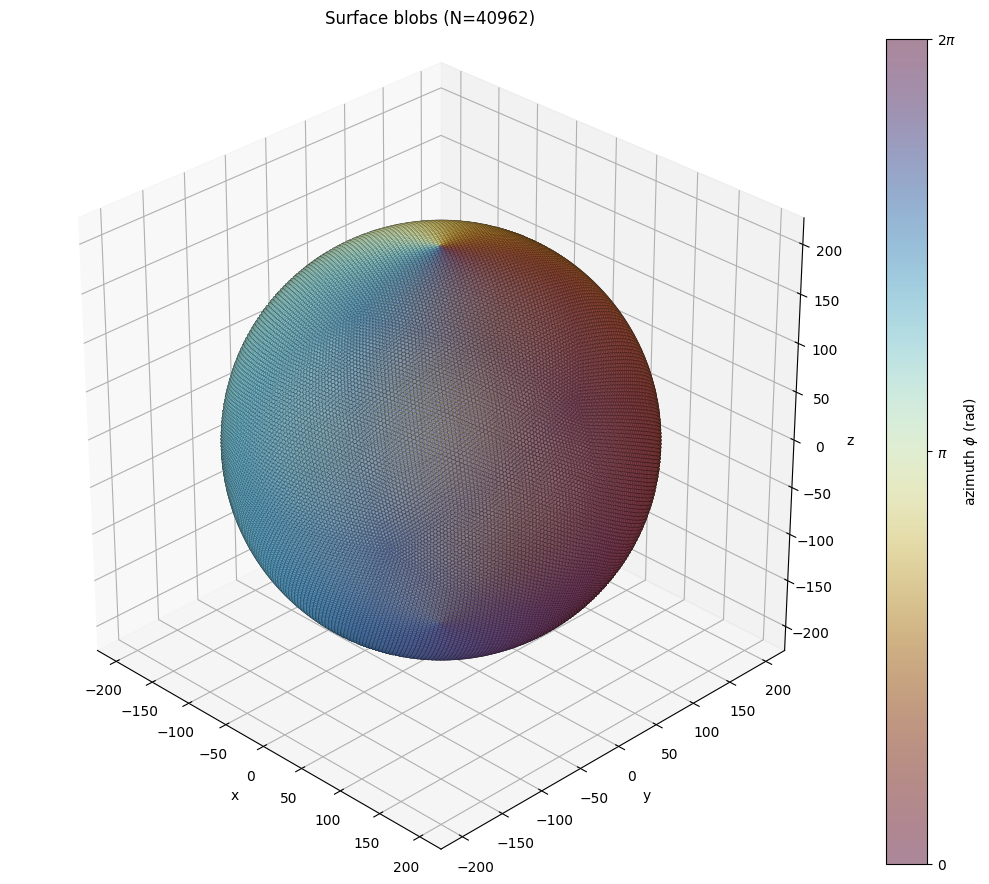

[info] Saved blob positions to analysis_output/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_azimuth.png
✅ Blob positions saved


In [4]:
# Plot blob positions (3D isometric view)
print("\n" + "=" * 60)
print("PLOTTING BLOB POSITIONS (Isometric View)")
print("=" * 60)
fig_blobs, ax_blobs = plot_blob_positions(
    sim_path,
    sim=sim,
    view="iso",
    color_by="azimuth",
    split_hemispheres=False,
    show=True,
    save=True
)
plt.close(fig_blobs)
print("✅ Blob positions saved")

## 3. Final Simulation Frame


PLOTTING FINAL FRAME
Final frame index: 1629 (t = 16.29 periods)


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:396: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


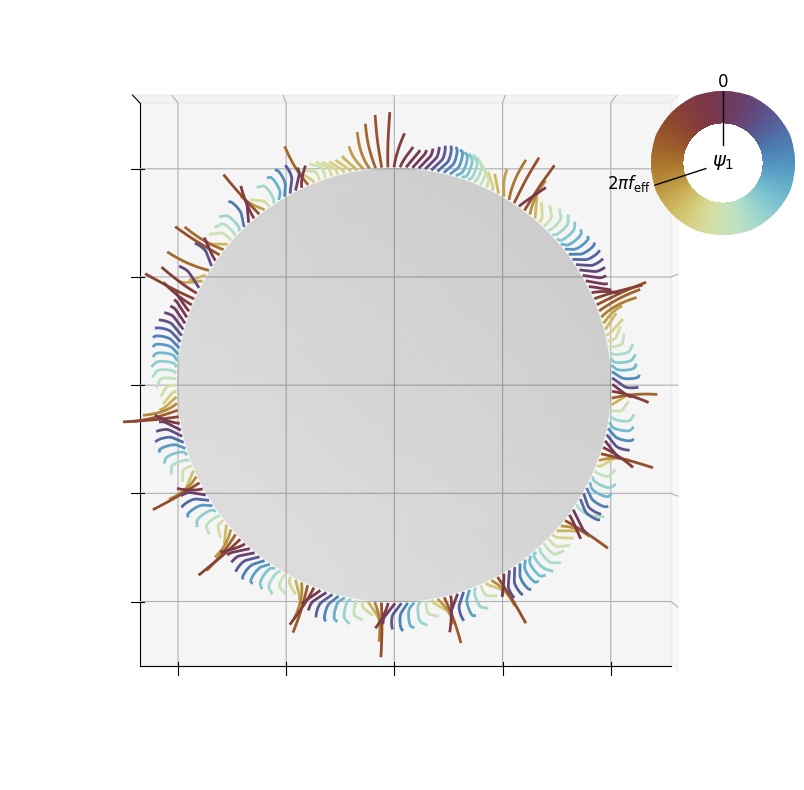

[info] Saved frame to analysis_output/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_top.png


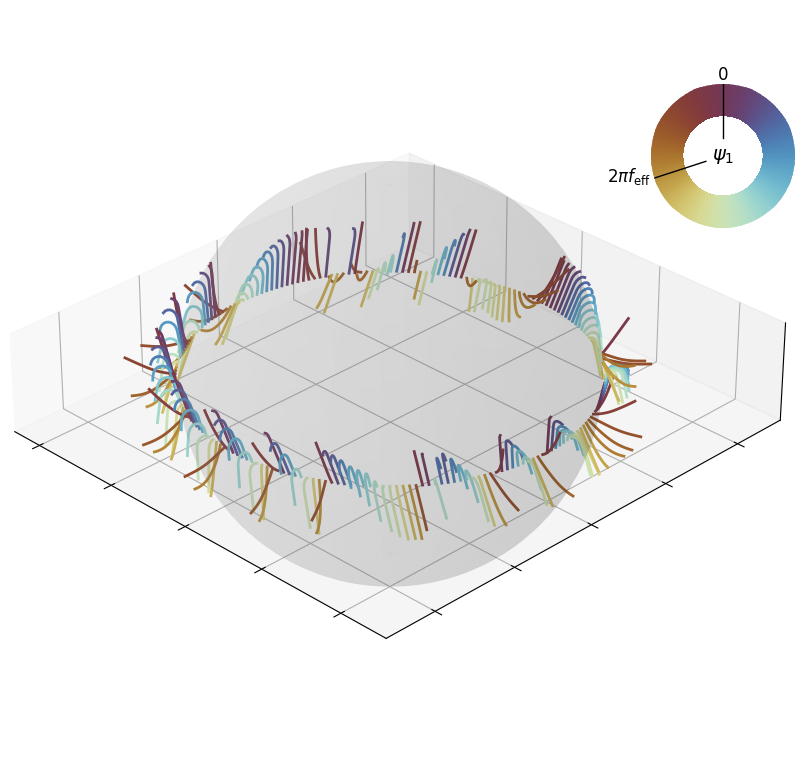

[info] Saved frame to analysis_output/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_iso.png
✅ Final frame visualizations saved


In [5]:
# Plot the final frame (last timestep)
print("\n" + "=" * 60)
print("PLOTTING FINAL FRAME")
print("=" * 60)
print(f"Final frame index: {sim.phases.shape[0]-1} (t = {sim.times[-1]:.2f} periods)")

# Top-down view
fig_final_top, ax_final_top = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="top",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_top)

# Isometric view
fig_final_iso, ax_final_iso = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="iso",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_iso)
print("✅ Final frame visualizations saved")

## 4. Kymograph Analysis


GENERATING KYMOGRAPH


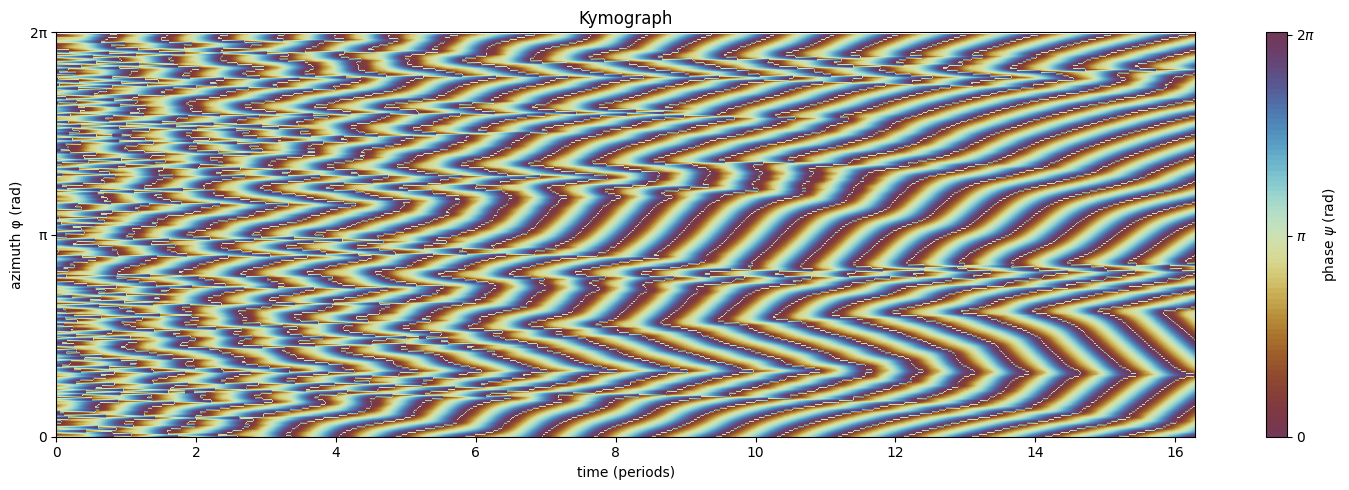

[info] Saved kymograph to analysis_output/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
✅ Kymograph saved
   Note: Any gaps in the azimuthal coverage appear as blank regions


In [6]:
# Generate kymograph
print("\n" + "=" * 60)
print("GENERATING KYMOGRAPH")
print("=" * 60)
fig_kymo, ax_kymo = plot_kymograph(
    sim_path,
    sim=sim,
    use_phi_axis=True,  # Show azimuthal gaps naturally
    show=True,
    save=True
)
plt.close(fig_kymo)
print("✅ Kymograph saved")
print("   Note: Any gaps in the azimuthal coverage appear as blank regions")

## 5. Wavelength Analysis (Stationary Curve Method)


ANALYZING WAVELENGTH (Stationary Curve Method)
Detecting coherent wave regions by analyzing wave velocity...
This method identifies regions with consistent wave propagation.

[info] Found 5 coherent sections


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:1300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


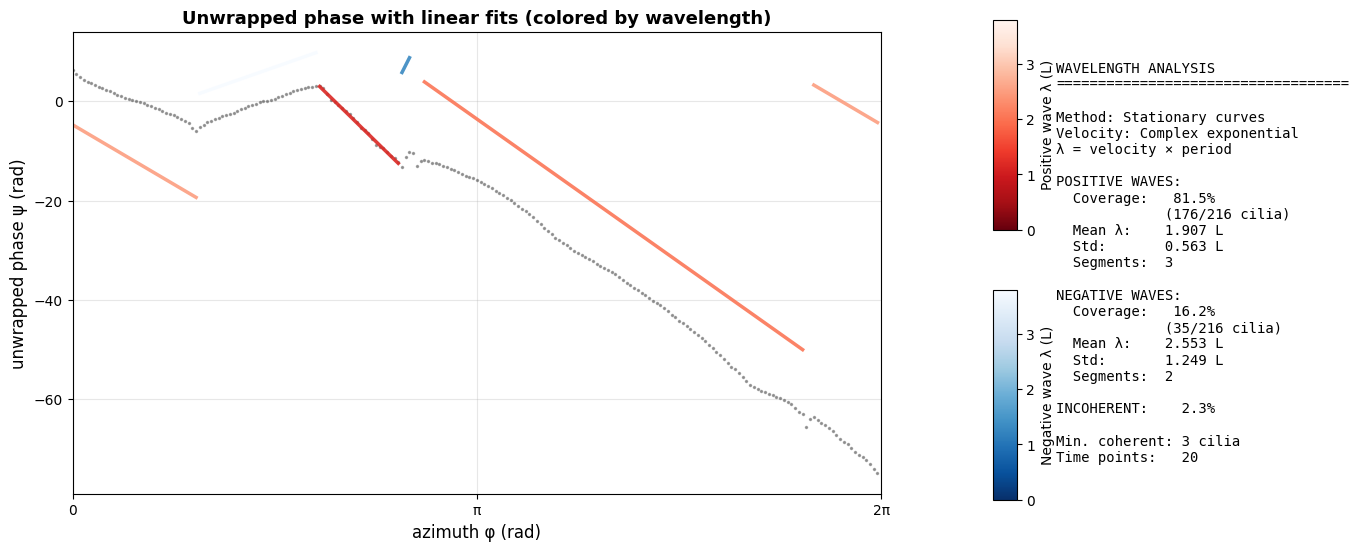


WAVELENGTH ANALYSIS RESULTS (Stationary Curve Method)
Positive waves: 81.5% coverage, mean λ = 1.907 L
Negative waves: 16.2% coverage, mean λ = 2.553 L
Incoherent:     2.3%
Total coherent segments: 5

WAVELENGTH ANALYSIS RESULTS

WAVE COVERAGE:
  Positive waves:  81.5% of cilia
  Negative waves:  16.2% of cilia
  Incoherent:      2.3% of cilia

POSITIVE WAVES (n=3 segments):
  Mean wavelength: 1.907 L
  Std deviation:   0.563 L

NEGATIVE WAVES (n=2 segments):
  Mean wavelength: 2.553 L
  Std deviation:   1.249 L

TOTAL COHERENT SEGMENTS: 5
TIME POINTS ANALYZED: 20

COHERENT SEGMENT DETAILS
Total coherent coverage: 97.7% of cilia
Wavelength range: [1.161, 3.802] L

Segment breakdown:
  Segment 1: positive wave, λ=2.520 L, covers 24.1% (52 cilia)
  Segment 2: negative wave, λ=3.802 L, covers 14.8% (32 cilia)
  Segment 3: positive wave, λ=1.161 L, covers 10.2% (22 cilia)
  Segment 4: negative wave, λ=1.304 L, covers 1.4% (3 cilia)
  Segment 5: positive wave, λ=2.039 L, covers 47.2% (102 

In [7]:
# Perform stationary curve wavelength analysis
print("\n" + "=" * 60)
print("ANALYZING WAVELENGTH (Stationary Curve Method)")
print("=" * 60)
print("Detecting coherent wave regions by analyzing wave velocity...")
print("This method identifies regions with consistent wave propagation.\n")

wavelength_result = estimate_wavelength_stationary_curves(
    sim_path,
    sim=sim,
    n_time_points=20,              # Analyze last 20 time points
    min_coherent_cilia=3,          # Minimum adjacent cilia for coherent wave
    velocity_threshold=0.01,       # Minimum velocity to be considered a wave
    filament_length=filament_length,  # Required for L-based reporting
    show_analysis=True
)

print("\n" + "=" * 60)
print("WAVELENGTH ANALYSIS RESULTS")
print("=" * 60)
print(f"\nWAVE COVERAGE:")
print(f"  Positive waves:  {wavelength_result.percent_positive_wave:.1f}% of cilia")
print(f"  Negative waves:  {wavelength_result.percent_negative_wave:.1f}% of cilia")
print(f"  Incoherent:      {wavelength_result.percent_incoherent:.1f}% of cilia")

print(f"\nPOSITIVE WAVES (n={wavelength_result.n_positive_segments} segments):")
if wavelength_result.n_positive_segments > 0:
    print(f"  Mean wavelength: {wavelength_result.mean_wavelength_positive:.3f} L")
    print(f"  Std deviation:   {wavelength_result.std_wavelength_positive:.3f} L")
else:
    print("  (No positive waves detected)")

print(f"\nNEGATIVE WAVES (n={wavelength_result.n_negative_segments} segments):")
if wavelength_result.n_negative_segments > 0:
    print(f"  Mean wavelength: {wavelength_result.mean_wavelength_negative:.3f} L")
    print(f"  Std deviation:   {wavelength_result.std_wavelength_negative:.3f} L")
else:
    print("  (No negative waves detected)")

print(f"\nTOTAL COHERENT SEGMENTS: {len(wavelength_result.coherent_wavelengths)}")
print(f"TIME POINTS ANALYZED: {wavelength_result.n_time_points}")
print("=" * 60)

# Additional analysis: Show segment details
print("\n" + "=" * 60)
print("COHERENT SEGMENT DETAILS")
print("=" * 60)
if len(wavelength_result.coherent_wavelengths) > 0:
    total_coherent = wavelength_result.percent_positive_wave + wavelength_result.percent_negative_wave
    print(f"Total coherent coverage: {total_coherent:.1f}% of cilia")
    print(f"Wavelength range: [{np.min(wavelength_result.coherent_wavelengths):.3f}, {np.max(wavelength_result.coherent_wavelengths):.3f}] L")
    
    # Show individual segments
    print(f"\nSegment breakdown:")
    for i, (wl, wtype, indices) in enumerate(zip(wavelength_result.coherent_wavelengths, 
                                                   wavelength_result.coherent_wave_types,
                                                   wavelength_result.coherent_coverage_indices)):
        direction = "positive" if wtype > 0 else "negative"
        coverage = len(indices) / sim.num_fils * 100
        print(f"  Segment {i+1}: {direction:8s} wave, λ={wl:.3f} L, covers {coverage:.1f}% ({len(indices)} cilia)")
else:
    print("No coherent segments detected!")
print("=" * 60)

## Summary

All analysis complete! Output files saved to `analysis_output/{category}_{date}/{N}fil/` directory:

- **Basal positions**: Shows where cilia attach to the sphere
- **Blob positions**: Shows the discrete representation of the sphere surface
- **Final frame**: Shows the cilia configuration at the end of the simulation
- **Kymograph**: Shows phase evolution over time and space
- **Wavelength analysis**: Uses stationary curve detection to identify coherent waves

**Wavelength Analysis Method:**

The analysis uses **stationary curve detection** to identify coherent metachronal waves:

1. **Compute wave velocity** at each cilium position: `v = -∂ψ/∂t / ∂ψ/∂φ`
   - Positive velocity → wave propagates in +φ direction (symplectic)
   - Negative velocity → wave propagates in -φ direction (antiplectic)

2. **Identify coherent sections**: Groups of ≥3 adjacent cilia with consistent wave direction

3. **Measure wavelength**: For each coherent section, fit linear slope to unwrapped phase
   - Wavelength `λ = 2π / |dψ/dφ|`

**Key advantages:**
- Based on actual wave propagation (stationary curves in kymograph)
- No arbitrary changepoint detection
- Shows unwrapped phase with clear linear sections
- Reports coverage as percentage of cilia (not arc length)

**Visualization shows:**
- Wave velocity profile across the equator
- Coherent section identification
- Unwrapped phase with linear fits for each wavelength
- Wavelength distributions for positive/negative waves

**Note on units:**
- Time is reported in **periods** (beat cycles)
- Wavelengths are reported in **radians**, **degrees**, **simulation units**, and **filament lengths (L)**
- Coverage is reported as **percentage of cilia** with coherent waves

In [8]:
# Print file locations
print("\n" + "=" * 60)
print("OUTPUT FILE LOCATIONS")
print("=" * 60)

# Construct the output subdirectory path
sim_path_obj = Path(sim_path)
parent_name = sim_path_obj.parent.name
grandparent_name = sim_path_obj.parent.parent.name
out_subdir = f"{grandparent_name}_{parent_name}/{sim.num_fils}fil"
output_dir = Path("analysis_output") / out_subdir

print(f"Output directory: {output_dir}")
print()

if output_dir.exists():
    files = sorted(output_dir.glob("*"))
    for f in files:
        print(f"  • {f.name}")
else:
    print("  (Output directory not yet created)")
print("=" * 60)
print("\n✅ ANALYSIS COMPLETE!")


OUTPUT FILE LOCATIONS
Output directory: analysis_output/beat_C_double_sphere_20260128/216fil

  (Output directory not yet created)

✅ ANALYSIS COMPLETE!
